### Now that you have trained the model, test it using a webcam using OpenCV, and detect the Face Masks in real-time

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [54]:
import keras
import time

In [3]:
model = keras.models.load_model('./mask_identifier.h5')

In [14]:
def show_image(image):
    image = image / 255.
    plt.imshow(image)
    plt.show()

In [34]:
def predict_mask(image):
    image = image / 255.
    return model.predict(np.array([image]))

In [61]:
def capture_video():
    image = None
    vid = cv2.VideoCapture(0)
    counter = 0
    while(counter < 10):
        time.sleep(0.5)
        ret, frame = vid.read()

        #cv2.imshow('frame', frame)
        frame = np.array(frame)
        counter+=1
    vid.release()
    plt.imshow(frame)
    plt.show()
    image = frame
    return image

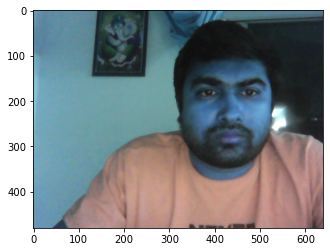

(224, 224, 3)
1


In [62]:
image_without_mask = capture_video()
resized_image = cv2.resize(image_without_mask, (224,224), interpolation=cv2.INTER_LINEAR)
print(resized_image.shape)
#show_image(resized_image)
result = predict_mask(resized_image)
print(np.argmax(result[0]))

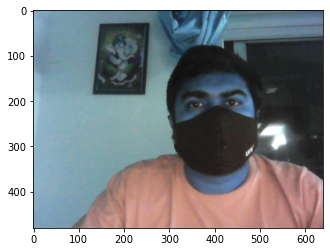

(224, 224, 3)
0


In [67]:
image_with_mask = capture_video()
resized_image = cv2.resize(image_with_mask, (224,224), interpolation=cv2.INTER_LINEAR)
print(resized_image.shape)
#show_image(resized_image)
result = predict_mask(resized_image)
print(np.argmax(result[0]))